In [71]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [60]:
class MazeEnv(gym.Env):
    def __init__(self):
        self.state = 0
        pass
    def reset(self):
        self.state = 0
        return self.state

    def step(self, action):
        if action == 0:
            self.state -= 3
        elif action == 1:
            self.state += 1
        elif action == 2:
            self.state += 3
        elif action == 3:
            self.state -= 1
        done = False
        if self.state == 8:
            reward = 1
            done = True
        else:
            reward = 0
        return self.state, reward, done, {}


In [61]:
class Agent:
    def __init__(self):
        self.actions = list(range(4))
        self.theta_0 = np.asarray([[np.nan,1,1,np.nan],
                                  [np.nan,1,np.nan,1],
                                  [np.nan,np.nan,1,1],
                                  [1,np.nan,np.nan,np.nan],
                                  [np.nan,1,1,np.nan],
                                  [1,np.nan,np.nan,1],
                                  [np.nan,1,np.nan,np.nan],
                                  [1,1,np.nan,1]])
        self.pi = self._cvt_theta(self.theta_0)
    
    def _cvt_theta(self, theta):
        m, n = theta.shape
        pi = np.zeros((m, n))
        for i in range(m):
            pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
        return np.nan_to_num(pi)
    
    def action_decision(self, state):
        action = np.random.choice(self.actions, p=self.pi[state, :])
        return action

In [62]:
env = MazeEnv()
state = env.reset()
agent = Agent()
done = False
print(agent.pi)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [0.         0.5        0.5        0.        ]
 [0.5        0.         0.         0.5       ]
 [0.         1.         0.         0.        ]
 [0.33333333 0.33333333 0.         0.33333333]]


In [63]:
action_history = []
state_history = [state]

while not done:
    action = agent.action_decision(state)
    state, reward, done, _ = env.step(action)
    action_history.append(action)
    state_history.append(state)

In [65]:
print(state_history)

[0, 3, 0, 1, 0, 1, 0, 3, 0, 3, 0, 1, 0, 3, 0, 1, 0, 1, 2, 1, 2, 1, 2, 5, 4, 5, 2, 5, 2, 1, 0, 1, 0, 3, 0, 1, 2, 5, 2, 5, 2, 5, 2, 1, 2, 1, 2, 1, 0, 3, 0, 1, 0, 1, 2, 5, 2, 1, 0, 1, 2, 5, 2, 1, 0, 3, 0, 3, 0, 1, 0, 1, 2, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 2, 5, 4, 5, 2, 1, 0, 3, 0, 3, 0, 1, 0, 1, 2, 1, 0, 3, 0, 1, 0, 1, 0, 3, 0, 3, 0, 3, 0, 1, 2, 5, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 5, 4, 5, 4, 5, 2, 5, 4, 5, 2, 5, 2, 5, 4, 7, 8]


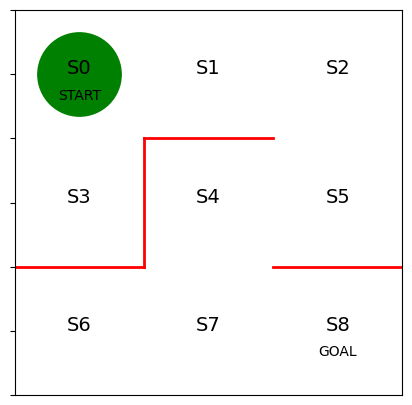

In [68]:
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)

plt.plot([2, 3], [1, 1], color='red', linewidth=2)
plt.plot([0, 1], [1, 1], color='red', linewidth=2)
plt.plot([1, 1], [1, 2], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)


plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

plt.tick_params(axis='both', which='both', 
                bottom=False, top=False,
                labelbottom=False, labelleft=False)

line, = ax.plot(0.5, 2.5, marker='o', color='g', markersize=60)

In [72]:
def init():
    line.set_data([], [])
    return (line,)
def animate(i):
    state = state_history[i]
    x = (state % 3) + 0.5
    y = 2.5 - int(state / 3)
    line.set_data(x, y)

In [74]:
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(state_history), interval=200, repeat=False)
anim.save('maze_agent.gif', writer='pillow')

e:\anaconda3\envs\ai_lab\lib\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
C:\Users\ChenYifan\AppData\Local\Temp\ipykernel_22296\774103895.py:8: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x, y)


In [75]:
HTML(anim.to_jshtml())

C:\Users\ChenYifan\AppData\Local\Temp\ipykernel_22296\774103895.py:8: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x, y)
